In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/metricbeat-data.csv')
df.shape

(5951, 180)

In [2]:
df.head()

,@timestamp,_id,_index,_score,_type,agent.ephemeral_id,agent.hostname,agent.id,agent.type,agent.version,...,system.socket.summary.tcp.all.count,system.socket.summary.tcp.all.established,system.socket.summary.tcp.all.listening,system.socket.summary.tcp.all.orphan,system.socket.summary.tcp.all.time_wait,system.socket.summary.tcp.memory,system.socket.summary.udp.all.count,system.socket.summary.udp.memory,system.uptime.duration.ms,user.name
0,"Jan 22, 2020 @ 18:29:20.168",52qEzm8B4Y7k9MlUGN0v,metricbeat-microservices,NaN,_doc,173d572b-178b-4140-a192-482460524c1a,BastionServer,c4aa750b-c80c-4add-978a-ab7c1133e661,metricbeat,7.5.0,...,10.0,2.0,8.0,0.0,0.0,"8,192",8.0,"8,192",NaN,NaN
1,"Jan 22, 2020 @ 18:29:20.069",5mqEzm8B4Y7k9MlUGN0v,metricbeat-microservices,NaN,_doc,173d572b-178b-4140-a192-482460524c1a,BastionServer,c4aa750b-c80c-4add-978a-ab7c1133e661,metricbeat,7.5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,root
2,"Jan 22, 2020 @ 18:29:18.778",t2qEzm8B4Y7k9MlUE9wj,metricbeat-microservices,NaN,_doc,173d572b-178b-4140-a192-482460524c1a,BastionServer,c4aa750b-c80c-4add-978a-ab7c1133e661,metricbeat,7.5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Jan 22, 2020 @ 18:29:16.546",qGqEzm8B4Y7k9MlUCtxs,metricbeat-microservices,NaN,_doc,173d572b-178b-4140-a192-482460524c1a,BastionServer,c4aa750b-c80c-4add-978a-ab7c1133e661,metricbeat,7.5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Jan 22, 2020 @ 18:29:15.161",oWqEzm8B4Y7k9MlUAdzl,metricbeat-microservices,NaN,_doc,173d572b-178b-4140-a192-482460524c1a,BastionServer,c4aa750b-c80c-4add-978a-ab7c1133e661,metricbeat,7.5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = [
    # duration
    'event.duration',
    # cpu
    'system.cpu.cores', 
    'system.cpu.idle.pct',
    'system.cpu.iowait.pct', 
    'system.cpu.irq.pct',
    'system.cpu.nice.pct', 
    'system.cpu.softirq.pct',
    'system.cpu.steal.pct', 
    'system.cpu.system.pct',
    'system.cpu.total.pct', 
    'system.cpu.user.pct',
    # memory
    'system.memory.actual.free', 
    'system.memory.actual.used.bytes',
    'system.memory.actual.used.pct', 
    'system.memory.free',
    'system.memory.hugepages.free', 
    'system.memory.hugepages.reserved',
    'system.memory.hugepages.surplus',
    'system.memory.hugepages.swap.out.fallback',
    'system.memory.hugepages.swap.out.pages',
    'system.memory.hugepages.total',
    'system.memory.hugepages.used.bytes',
    'system.memory.hugepages.used.pct', 
    'system.memory.swap.free',
    'system.memory.swap.in.pages', 
    'system.memory.swap.out.pages',
    'system.memory.swap.readahead.cached',
    'system.memory.swap.readahead.pages', 
    'system.memory.swap.total',
    'system.memory.swap.used.bytes', 
    'system.memory.swap.used.pct',
    'system.memory.total', 
    'system.memory.used.bytes',
    'system.memory.used.pct'    
]

cpu_cols = [
    # duration
    'event.duration',
    # cpu
    'system.cpu.cores', 
    'system.cpu.idle.pct',
    'system.cpu.iowait.pct', 
    'system.cpu.irq.pct',
    'system.cpu.nice.pct', 
    'system.cpu.softirq.pct',
    'system.cpu.steal.pct', 
    'system.cpu.system.pct',
    'system.cpu.total.pct', 
    'system.cpu.user.pct'
]

memory_cols = [
    # duration
    'event.duration',
    # memory
    'system.memory.actual.free', 
    'system.memory.actual.used.bytes',
    'system.memory.actual.used.pct', 
    'system.memory.free',
    'system.memory.hugepages.free', 
    'system.memory.hugepages.reserved',
    'system.memory.hugepages.surplus',
    'system.memory.hugepages.swap.out.fallback',
    'system.memory.hugepages.swap.out.pages',
    'system.memory.hugepages.total',
    'system.memory.hugepages.used.bytes',
    'system.memory.hugepages.used.pct', 
    'system.memory.swap.free',
    'system.memory.swap.in.pages', 
    'system.memory.swap.out.pages',
    'system.memory.swap.readahead.cached',
    'system.memory.swap.readahead.pages', 
    'system.memory.swap.total',
    'system.memory.swap.used.bytes', 
    'system.memory.swap.used.pct',
    'system.memory.total', 
    'system.memory.used.bytes',
    'system.memory.used.pct'    
]

In [4]:
df[cols].describe()

,system.cpu.cores,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.irq.pct,system.cpu.nice.pct,system.cpu.softirq.pct,system.cpu.steal.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,...,system.memory.hugepages.used.pct,system.memory.swap.free,system.memory.swap.in.pages,system.memory.swap.out.pages,system.memory.swap.readahead.cached,system.memory.swap.readahead.pages,system.memory.swap.total,system.memory.swap.used.bytes,system.memory.swap.used.pct,system.memory.used.pct
count,495.0,495.000000,495.000000,495.0,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,496.0,496.0,496.0,496.0,496.0,496.0,496.0,496.0,496.0,496.000000
mean,1.0,0.989448,0.000648,0.0,0.001010,0.000170,0.000877,0.002386,0.009903,0.005459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929474
std,0.0,0.052227,0.010213,0.0,0.015819,0.000381,0.004042,0.025747,0.042072,0.001942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005578
min,1.0,0.014000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002000,0.002000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.922000
25%,1.0,0.991000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005000,0.004000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.925000
50%,1.0,0.993000,0.000000,0.0,0.000000,0.000000,0.001000,0.001000,0.007000,0.005000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.925000
75%,1.0,0.995000,0.000000,0.0,0.000000,0.000000,0.001000,0.001000,0.009000,0.007000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935000
max,1.0,0.998000,0.188000,0.0,0.304000,0.002000,0.086000,0.484000,0.798000,0.011000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938000


In [5]:
df_cpu = df[cpu_cols].dropna()
df_memory = df[memory_cols].dropna()

In [6]:
print(df_cpu.shape)
print(df_memory.shape)

(495, 11)
(496, 24)


## DBSCAN CPU

In [7]:
for col in df_cpu.columns.values:
    df_cpu[col] = df_cpu[col].astype(str).str.replace(',', '').astype(float)
df_cpu.describe()

,event.duration,system.cpu.cores,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.irq.pct,system.cpu.nice.pct,system.cpu.softirq.pct,system.cpu.steal.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct
count,495.000000,495.0,495.000000,495.000000,495.0,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,178410.369697,1.0,0.989448,0.000648,0.0,0.001010,0.000170,0.000877,0.002386,0.009903,0.005459
std,17944.268134,0.0,0.052227,0.010213,0.0,0.015819,0.000381,0.004042,0.025747,0.042072,0.001942
min,130475.000000,1.0,0.014000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002000,0.002000
25%,167436.500000,1.0,0.991000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005000,0.004000
50%,172355.000000,1.0,0.993000,0.000000,0.0,0.000000,0.000000,0.001000,0.001000,0.007000,0.005000
75%,189930.500000,1.0,0.995000,0.000000,0.0,0.000000,0.000000,0.001000,0.001000,0.009000,0.007000
max,276472.000000,1.0,0.998000,0.188000,0.0,0.304000,0.002000,0.086000,0.484000,0.798000,0.011000


In [8]:
df_cpu = df_cpu.drop(['system.cpu.cores', 'system.cpu.irq.pct', 'system.cpu.nice.pct'], axis=1)
df_cpu.describe()

,event.duration,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.steal.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,178410.369697,0.989448,0.000648,0.000170,0.000877,0.002386,0.009903,0.005459
std,17944.268134,0.052227,0.010213,0.000381,0.004042,0.025747,0.042072,0.001942
min,130475.000000,0.014000,0.000000,0.000000,0.000000,0.000000,0.002000,0.002000
25%,167436.500000,0.991000,0.000000,0.000000,0.000000,0.000000,0.005000,0.004000
50%,172355.000000,0.993000,0.000000,0.000000,0.001000,0.001000,0.007000,0.005000
75%,189930.500000,0.995000,0.000000,0.000000,0.001000,0.001000,0.009000,0.007000
max,276472.000000,0.998000,0.188000,0.002000,0.086000,0.484000,0.798000,0.011000


In [9]:
from sklearn.preprocessing import StandardScaler

df_cpu_scalled = StandardScaler().fit_transform(df_cpu)

df_cpu_scalled = pd.DataFrame(df_cpu_scalled, columns=df_cpu.columns.values)
df_cpu_scalled.head()

,event.duration,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.steal.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct
0,-0.295455,0.125569,-0.063561,-0.445738,-0.217125,-0.053881,-0.140449,-1.267340
1,1.133129,0.048903,-0.063561,-0.445738,0.278161,-0.092759,-0.045278,0.279086
2,-0.373051,0.068070,-0.063561,-0.445738,-0.217125,-0.015002,-0.069071,-0.751865
3,0.048847,0.068070,-0.063561,-0.445738,0.030518,-0.053881,-0.069071,-0.236390
4,-0.929725,0.068070,-0.063561,-0.445738,-0.217125,-0.053881,-0.069071,0.279086


In [10]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=0.3, min_samples=10).fit(df_cpu_scalled)
core_samples_mask = np.zeros_like(db_model.labels_, dtype=bool)
core_samples_mask[db_model.core_sample_indices_] = True
labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 236


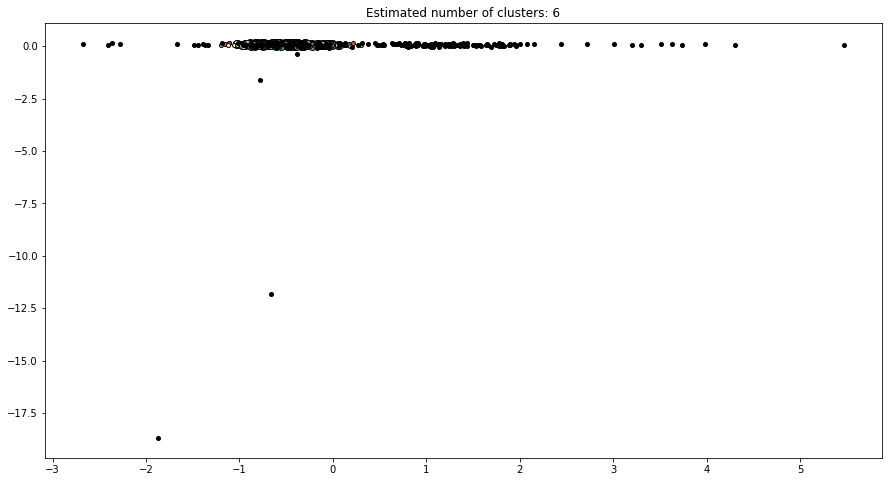

In [11]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(15,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_cpu_scalled[class_member_mask & core_samples_mask]
   
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    xy = df_cpu_scalled[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [12]:
import collections

collections.Counter(db_model.labels_)

Counter({0: 39, -1: 236, 1: 62, 3: 37, 2: 45, 4: 48, 5: 28})

In [13]:
from sklearn import metrics

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_cpu_scalled, labels))

Silhouette Coefficient: 0.062


## DBSCAN MEMORY

In [14]:
for col in df_memory.columns.values:
    df_memory[col] = df_memory[col].astype(str).str.replace(',', '').astype(float)
df_memory.describe()

,event.duration,system.memory.actual.free,system.memory.actual.used.bytes,system.memory.actual.used.pct,system.memory.free,system.memory.hugepages.free,system.memory.hugepages.reserved,system.memory.hugepages.surplus,system.memory.hugepages.swap.out.fallback,system.memory.hugepages.swap.out.pages,...,system.memory.swap.in.pages,system.memory.swap.out.pages,system.memory.swap.readahead.cached,system.memory.swap.readahead.pages,system.memory.swap.total,system.memory.swap.used.bytes,system.memory.swap.used.pct,system.memory.total,system.memory.used.bytes,system.memory.used.pct
count,4.960000e+02,4.960000e+02,4.960000e+02,496.000000,4.960000e+02,496.0,496.0,496.0,496.0,496.0,...,496.0,496.0,496.0,496.0,496.0,496.0,496.0,4.960000e+02,4.960000e+02,496.000000
mean,1.257972e+06,5.767106e+08,4.547359e+08,0.440758,7.275744e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031447e+09,9.586891e+08,0.929474
std,2.807364e+05,6.671614e+06,6.671614e+06,0.006519,5.851004e+06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,5.851004e+06,0.005578
min,1.048182e+06,5.665546e+08,4.465132e+08,0.433000,6.445466e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031447e+09,9.507103e+08,0.922000
25%,1.122941e+06,5.702533e+08,4.478730e+08,0.434000,6.677299e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031447e+09,9.535406e+08,0.925000
50%,1.233748e+06,5.706117e+08,4.608348e+08,0.447000,7.758234e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031447e+09,9.538642e+08,0.925000
75%,1.272392e+06,5.835735e+08,4.611932e+08,0.447000,7.790592e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031447e+09,9.646735e+08,0.935000
max,3.009037e+06,5.849334e+08,4.648919e+08,0.451000,8.073626e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031447e+09,9.669919e+08,0.938000


In [15]:
from sklearn.preprocessing import StandardScaler

df_memory_scalled = StandardScaler().fit_transform(df_memory)

df_memory_scalled = pd.DataFrame(df_memory_scalled, columns=df_memory.columns.values)
df_memory_scalled.head()

,event.duration,system.memory.actual.free,system.memory.actual.used.bytes,system.memory.actual.used.pct,system.memory.free,system.memory.hugepages.free,system.memory.hugepages.reserved,system.memory.hugepages.surplus,system.memory.hugepages.swap.out.fallback,system.memory.hugepages.swap.out.pages,...,system.memory.swap.in.pages,system.memory.swap.out.pages,system.memory.swap.readahead.cached,system.memory.swap.readahead.pages,system.memory.swap.total,system.memory.swap.used.bytes,system.memory.swap.used.pct,system.memory.total,system.memory.used.bytes,system.memory.used.pct
0,-0.047793,-0.933828,0.933828,0.958494,0.880820,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.880820,-0.802795
1,0.146845,-0.933828,0.933828,0.958494,0.880820,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.880820,-0.802795
2,4.709360,-0.934442,0.934442,0.958494,0.880820,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.880820,-0.802795
3,-0.090981,-0.934442,0.934442,0.958494,0.880820,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.880820,-0.802795
4,-0.039785,-0.944276,0.944276,0.958494,0.869608,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.869608,-0.802795


In [16]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=0.3, min_samples=10).fit(df_memory_scalled)
core_samples_mask = np.zeros_like(db_model.labels_, dtype=bool)
core_samples_mask[db_model.core_sample_indices_] = True
labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 32


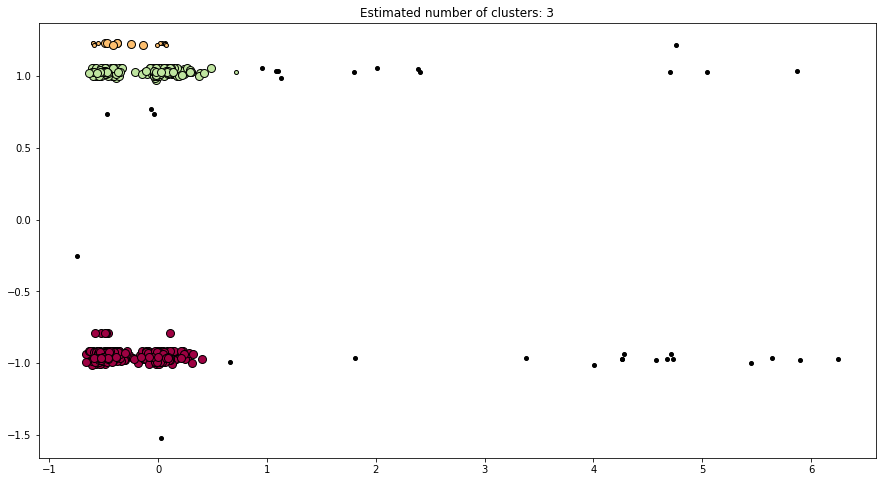

In [17]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(15,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_memory_scalled[class_member_mask & core_samples_mask]
   
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    xy = df_memory_scalled[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [18]:
import collections

collections.Counter(db_model.labels_)

Counter({0: 242, -1: 32, 1: 18, 2: 204})

In [19]:
from sklearn import metrics

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_memory_scalled, labels))

Silhouette Coefficient: 0.584
